# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib
%matplotlib inline

In [3]:
mri_file = nib.load("../imgs/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = mri_file.get_fdata()

In [6]:
affine = mri_file.affine
shape = mri_file.shape

In [8]:
print(affine)
print(shape)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 150)


In [9]:
mri_file.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [8]:
nib.aff2axcodes(affine)

('L', 'A', 'S')

## Display Slices

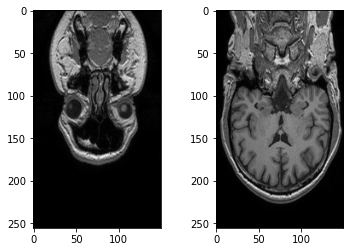

In [17]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40,:,:], cmap="gray")
axis[1].imshow(brain_mri_data[120,:,:], cmap="gray") 

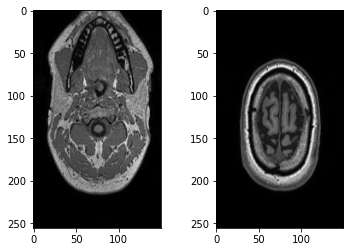

In [22]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,30,:], cmap="gray")
axis[1].imshow(brain_mri_data[:,200,:], cmap="gray") 

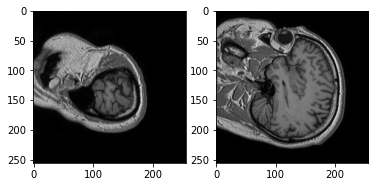

In [23]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,20], cmap="gray")
axis[1].imshow(brain_mri_data[:,:,45], cmap="gray") 

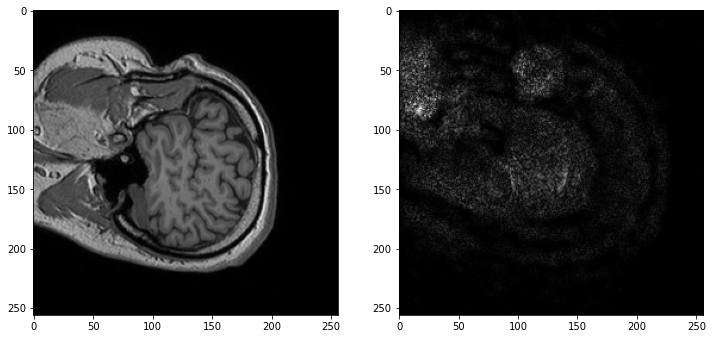

In [30]:
fig, axis = plt.subplots(1,2,figsize=(12,12))
axis[0].imshow(brain_mri_data[:,:,32], cmap="gray")
axis[1].imshow(brain_mri_data[:,:,149], cmap="gray") 

## Transformation

In [12]:
voxel_coords = np.array((0,0,0,1))

In [13]:
voxel_coords

array([0, 0, 0, 1])

In [14]:
physical_coords = affine @ voxel_coords

In [15]:
physical_coords

array([ 134.37597656,  -80.33934021, -139.00111389,    1.        ])

In [16]:
affine[:, 3:]

array([[ 134.37597656],
       [ -80.33934021],
       [-139.00111389],
       [   1.        ]])

In [17]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual 

array([ 134.37597656,  -80.33934021, -139.00111389])

In [18]:
physical_coords = [ 134.37597656,  -80.33934021, -139.00111389,    1.        ]
(np.linalg.inv(affine) @ physical_coords).round()

array([0., 0., 0., 1.])

## Resampling

In [23]:
print(mri_data.shape)
print(mri_file.header.get_zooms())

(256, 256, 10)
(1.0, 1.0, 1.0)


In [24]:
import nibabel.processing

In [25]:
voxel_size = (2,2,2)
mri_resized = nibabel.processing.conform(mri_file, (128,128,100), voxel_size, orientation="PSR")
mri_resized_data = mri_resized.get_fdata()

In [26]:
print(mri_resized.shape)
print(mri_resized.header.get_zooms())

(128, 128, 100)
(2.0, 2.0, 2.0)


## Displaying Image

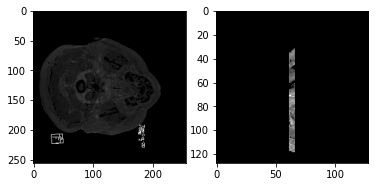

In [36]:
fig, axis = plt.subplots(1,2)

axis[0].imshow(mri_data[:,:,3], cmap="gray")
axis[1].imshow(mri_resized_data[:,:,70], cmap="gray")

## Normalization and Standardization